In [90]:
import pandas as pd
import numpy as np

import biometeo
from matplotlib import pyplot as plt


In [103]:
df = pd.read_table ('PW4_data\Moscow_VDNKh_2010.txt', names = ['date', 'hour', 'lon', 'lat', 'elev', 'ta', 'rh', 'vel', 'tcc', 'ts'])
df['UTC time'] = [pd.to_datetime (date + ' ' + str (hour), format='%d.%m.%Y %H') for date,hour in zip(df['date'], df['hour'])]
df['MSK time'] = df['UTC time'] + pd.Timedelta(hours=3)

df = df.set_index('UTC time').drop(columns = ['date', 'hour'])
display(df.head())




,lon,lat,elev,ta,rh,vel,tcc,ts,MSK time
UTC time,,,,,,,,,
2010-01-01 00:00:00,37.62,55.83,148,-6.0,91.9,0.4,8.0,-6.3,2010-01-01 03:00:00
2010-01-01 03:00:00,37.62,55.83,148,-9.2,91.6,0.4,8.0,-10.5,2010-01-01 06:00:00
2010-01-01 06:00:00,37.62,55.83,148,-11.5,90.0,0.4,7.2,-15.4,2010-01-01 09:00:00
2010-01-01 09:00:00,37.62,55.83,148,-10.1,85.1,0.7,6.4,-10.2,2010-01-01 12:00:00
2010-01-01 12:00:00,37.62,55.83,148,-8.9,82.6,0.7,5.6,-10.2,2010-01-01 15:00:00


3.5860902843190967

2.787388023568921

2.2803760313722687

2.411580122682053

2.573577344123988

2.1710762806039794

1.7943426768619049

1.542900405833292

1.90288890563443

2.3953089298518253

2.298168734171051

2.2803188369039646

2.1527345605544324

1.9502472539593931

1.6783999478416125

1.826228974953389

1.6218018983706421

1.333686665190789

1.2120405031390746

1.0995638663745704

1.1001199496606422

1.0341644703527393

1.0165186292206685

0.9297571176915775

0.9216457145211787

0.9724912630601502

0.9544753861626882

1.3097454527059005

1.5151303257078808

1.5296758733744402

1.5424117172284206

2.082914997845082

2.280727974142722

2.0660663278784757

2.0827018579146634

1.9336825162351063

1.8091058172503742

1.7210939740126294

1.6498131561335379

1.809599507975398

1.6498131561335379

1.5025970793441767

1.5424117172284206

1.7494939456091925

1.9981853087431283

1.90288890563443

1.90288890563443

1.5686534290883507

1.5153561589806182

1.664578773959292

1.918064942162514

1.9492624172693773

2.3735301593640097

2.4336638784632374

2.4913949042091823

2.5541585554959503

2.6349068584449196

2.8082740678936466

2.99366718981532

3.18774118479239

3.4209592724382945

3.6414245798051086

3.6687681431983448

3.2372972430207807

3.0891575592964484

3.2125526882751965

3.1879758790616903

2.511253603222339

2.2607211747423

1.9340833510188704

1.6792338598843333

1.356763204905107

1.1809611200932086

1.403619925228855

1.0529892762305428

1.391604543500019

1.720478522060765

1.5171910799446984

1.3917525982763805

1.441361381210955

1.429208356564199

1.3224088099598166

1.345172978824829

1.826228974953389

2.6142833173758646

2.1181302700878573

1.7943426768619049

1.6359680237234935

1.5171910799446984

1.441361381210955

1.502801051399636

2.298786650051272

2.3924879619485377

1.9498821264312145

1.720478522060765

1.7943426768619049

1.7943426768619049

2.206226606402895

2.4336638784632374

2.9940623604870216

2.854863644453847

2.9017976233658302

2.766546070590734

2.972212565047119

2.765595763489009

2.471925936240931

2.513512484657632

2.7885761289032716

2.97048307758755

3.2394640998566016

3.065094207704842

2.831634982721583

2.680092269735085

2.243947472761997

2.354813658446228

3.163118860051318

3.0168640553019856

2.4336638784632374

2.4120507364611634

2.225927915055948

2.5736281156049023

2.7013653894707828

2.925193207256648

2.8082740678936466

2.701292198640555

2.8082740678936466

2.766546070590734

2.700648052766682

2.1527345605544324

1.6923231935620642

1.5298726313147057

1.8244888560559411

1.9340833510188704

1.6923231935620642

1.5299976204824333

1.3799748279453372

1.2019051342361349

1.081847520251722

1.0435101732892986

1.6496637000741339

1.6784369786795221

1.3563281864237762

1.1911435488929039

1.043870725901715

1.0169366690366186

0.9632730382450853

0.9045881068441249

1.6771611987216621

1.6913784329223642

1.427521997529567

1.1911435488929039

1.0914675868620523

0.9981459807306853

1.0069059941416625

0.8344146036789792

1.1402965753615928

1.5552418908469936

1.6771611987216621

1.9028269490912229

1.9183985299367678

1.9028269490912229

1.8720206704211213

1.7210939740126294

1.4638848792266117

1.5158937452824681

1.5150786039423996

1.333686665190789

1.1501010617432281

1.0257475786802757

0.8644500067030673

0.8577266428613124

1.159980687391838

1.4275725430664707

1.2769536046165715

1.4777577625579545

1.5943044743131976

1.4899271404598708

1.4901562457836446

1.3208482342469723

1.1703378020397166

1.0806025539435982

1.070933901953144

0.9892310223797035

0.880022196028829

0.753912489847546

0.7614561922318758

0.7614561922318758

0.9116181170182719

0.9543565741314389

1.2533463575794184

1.070933901953144

1.2437752046161292

1.287801953477735

1.201764741237226

1.3453234807082715

1.4655494478337172

1.3905497697326883

1.2539316450048668

1.0068496935766968

0.797185185526883

0.6880453169872577

0.6208492145803168

0.581755676521704

0.7200927765129214

0.8572110578255658

0.8192632252112244

0.8967313890086496

0.818723703768608

0.7206676886812415

0.7206676886812415

0.6878578970519089

1.043653777711736

1.254293168039696

1.1799673653618175

1.1708564363940224

1.0069059941416625

1.2447062967360139

1.1105210423641212

1.1495210666887932

1.3682895755700935

1.568167000999475

1.439494540257937

1.333686665190789

1.3099755609053738

1.2326611815893216

1.1799673653618175

1.266186805372491

1.4778072319188513

1.7352422671643153

1.7070484142530615

1.6634371600900137

1.7070484142530615

1.8873678981288107

1.8244888560559411

1.8394871092467773

2.014332161045504

2.1001040042015955

1.9336482731838356

1.7649257213256324

2.1878405916506556

2.0172658340011904

1.9823992476865178

1.8873317750025724

2.3735301593640097

2.449889185575906

2.354190389264347

2.7212020884381194

2.947458340246336

3.2125333041718083

3.4473785570224433

5.159878073778092

5.1549969788453085

4.820094950441524

4.115210709209798

4.5759676443532005

4.537084784521942

4.1773655272806

4.053313285950909

4.210123074727273

4.176860935933

3.900421957153168

4.179342107919514

4.541249523921631

4.114450698518596

4.469396464320234

3.901330617132585

3.808129058796878

3.6672045094104657

3.692426346189091

4.341155484955142

4.112657734749169

3.8419988264895117

3.3123673498435

2.945482971679837

2.4516876977625053

2.2028244732120172

2.099212177452667

2.294319677594567

2.0997885643692262

1.675584988626708

1.355342774945177

1.3201277840941397

1.2650608871534017

1.592565207707059

1.703521604074108

1.6633274374006373

1.5684858931777887

1.5013798496705917

1.4275725430664707

1.1799673653618175

1.0714400512778433

1.8531184470314193

2.133235402618287

1.77877473720442

1.5817735698427908

1.4033942922653624

1.3453234807082715

1.2117437292063042

1.0807732447328746

2.1169485694937196

2.2419038030123475

1.934147996640501

1.6913784329223642

1.7050953162571634

1.608307426634722

1.5817735698427908

1.4901971460290906

1.5013798496705917

1.5540875748607637

1.2097492068287434

1.3661744425239426

1.3093834536599462

1.2100292205982923

1.319846998602171

1.6490559443450208

2.2794175763071163

2.6561589193365713

2.699192582560269

2.27688511520859

2.0997885643692262

2.031445075739795

1.6211692127538588

1.5813214297474067

1.6626908366933772

1.949344064418437

1.9835490976387449

2.0827018579146634

2.205288599866109

2.2434845988659613

2.1885887334218914

1.9835490976387449

1.9835490976387449

1.733996473878192

1.4022598565312758

1.2516934386843748

1.2193271542155546

1.0790771262336762

1.128819527880842

1.0882334054665441

1.1686235972898522

1.2510659730518205

1.3426745249308665

1.2516730661087787

1.4022598565312758

1.2968988526208343

1.3074450167549723

1.1901286137747742

1.3312000040410552

1.7064676214746684

1.9182097490983392

2.206226606402895

2.3547058952146283

2.3547058952146283

2.336014353952101

2.280727974142722

2.299026198624079

2.2428708196429503

2.1704011929134306

2.336014353952101

2.4341041186372445

2.336014353952101

2.4930552427595534

2.4930552427595534

2.6349068584449196

2.8538726447287415

2.810874147119223

2.7203901579106216

2.6143211313986723

2.700648052766682

2.4522585271594908

2.1527345605544324

2.2607211747423

2.4107988083881438

2.314392575452377

1.8244888560559411

1.6496637000741339

1.6653179485316707

1.6496637000741339

2.0172658340011904

2.280727974142722

2.335797814736344

2.2054004595839864

1.965795574023027

1.5954866256717202

1.2889066553585924

1.1915737315028245

1.311156115322604

2.6554290576873676

3.0154009832798576

3.2400330839127607

3.585525739052482

3.4200620724460826

3.140694016058263

2.262096575935617

2.243947472761997

2.924592029938431

3.2657384135130285

3.557119477059382

3.727696506174664

3.6122003911228284

3.727483382328876

3.11554887232501

2.765595763489009

2.3924879619485377

2.2418817283670296

1.8696456749192505

1.809599507975398

1.7801447810993083

1.7511174727382288

1.650859020899067

1.4901562457836446

1.6362885527973685

1.6771611987216621

1.7210939740126294

1.9340833510188704

2.066158690001565

2.066158690001565

2.1167904493054843

2.033005163415699

2.1536884740738094

2.134231136208017

2.15314204500986

2.3547058952146283

1.9981853087431283

2.0994563009178298

2.1364245439391936

2.453615401273527

3.3937062296552067

3.528506817367803

3.4723139926282984

3.5575933509802136

3.39575820801626

3.7815583701872306

4.441111717440449

5.078632186055771

5.673701688394338

5.926186966363898

6.19359644196552

6.1036863828440415

6.284623463999485

6.060921494120902

6.060921494120902

5.1159928844994

4.468771463510909

4.302537157124349

4.113534819293437

3.723430741088985

3.337626550462715

3.529429430436127

4.081921952319058

4.787065783489458

5.589929639772039

6.013783377673564

5.303983249705648

5.307136919408045

5.153648280294057

4.856862325982687

4.60965939410017

4.5759676443532005

4.8165141355083545

4.92617952164906

4.537610411901788

4.080354099773818

4.3721304311087374

4.438915544690225

4.471994206629316

4.210675404663552

3.900127466050002

3.839458327921786

3.7223262059274433

3.725436830229206

3.725436830229206

3.900421957153168

4.053313285950909

4.20852200430838

4.541313678042893

4.858547075309833

5.006424194892982

5.231151465486681

5.8037108969637226

6.017549439921481

6.06114196572682

6.06114196572682

6.197456088063653

6.1496983010098045

6.281320856798363

5.926891333556255

5.800985833271703

5.630025894929397

5.389912898478031

4.9289946

4.269468796357929

3.631259061066892

3.864157763051848

4.080661614148973

4.67813763762783

4.340934769537378

3.9602132702544983

3.9928173132238167

4.110117553664864

3.9247722240874667

3.6938239732308906

3.7200393032507657

4.2107947625337285

3.5541888839964746

3.6112341453758248

3.3920137599797426

3.6653037714057586

3.5007430112776357

4.051389593490359

3.2643075931536116

3.39575820801626

2.97048307758755

3.163118860051318

3.165549362636502

3.339519720090801

3.4203711991037555

2.991115470566411

2.6143298864928677

2.592261783971447

2.511170246537746

2.2803760313722687

2.5736281156049023

2.763010925862269

2.7870771148093407

2.720393609732114

2.552710204832744

2.410803459093446

2.049548978592736

1.7347119243942029

1.9823992476865178

2.5099490391886925

2.314969822886792

2.2591492848983523

2.206175018654441

2.278697560314056

2.372711358095287

2.186238107730075

2.3714634199941775

2.7401997062950305

3.3897684489604774

3.6968376523904887

3.5575933509802136

3.4209592724382945

3.3178661712008504

3.091272177385951

3.2647029651913937

3.9579130458407974

3.5242006000000003

4.305788027938117

4.46983987984626

4.433936799754238

4.504040975994833

4.712071778059875

5.076124311491693

5.0026645870611

5.42090032003989

4.434781780233771

3.5516945019641457

3.156958841891756

3.064183088629887

3.063274799887126

3.3904096506451933

3.57899006732734

3.284621839758155

2.8048748456130848

3.0634193206505183

3.261547982369218

2.7830476305999574

2.7181907091907553

3.1593964918284647

3.7749302596300263

4.109805628757609

3.8086578791344414

4.607757384488057

4.6455938020734795

3.582985354943145

2.876029076165788

2.787321899099811

3.2361061504731072

3.1120717148554142

3.365523505297096

3.781271545757244

3.3662662533483854

3.140694016058263

2.857107051527479

3.422083515092215

3.5562371091806564

3.4456633928218237

2.8774485658080584

2.8980087816990796

2.785302098340195

2.83389446040742

2.677840022642632

2.5119286040185655

2.59355085798592

2.591299575494835

2.4894271777364674

2.2794175763071163

1.9981853087431283

1.999606525727913

2.1181302700878573

2.280727974142722

2.373586843124642

2.5095732405725464

2.2956477023865283

2.133235402618287

1.9182097490983392

1.8246069349234628

1.6223737208441653

2.31572301958073

2.805681336205586

2.917150985694046

2.872082774163294

2.8515947150479466

3.2615254829899145

3.289100721145406

3.1646563880117378

3.2350425359023705

4.053313285950909

4.7149392103874685

5.473783383230423

6.14967756139827

6.23831200602621

5.714768358400356

5.888427508276532

6.4269914987326775

6.952204073389459

7.3601158308976995

7.578661850531533

7.050107107736951

6.9524571400691

6.660153151897843

7.206274830672143

7.412748330644622

8.247008264013505

8.597201039371079

8.303078907165384

7.961537834063536

7.794923962690797

7.5772122609297545

7.850117220293759

8.480360461870916

8.186292037357536

6.192658242662941

5.926891333556255

5.156503671037702

4.5014486

3.666071754173983

3.260193881524844

3.8392834995076948

4.173371103073167

4.042387563786905

3.5220238361069662

3.4461691812932918

3.7802341139829787

4.140556479649402

5.0043643864061895

4.964006254387365

6.105385488542251

5.7546658063164955

5.47152936789071

4.787601449345722

4.019584481640281

3.212238899534366

2.9008787535304776

3.0618890602961453

3.081376475078619

3.0340560965250676

3.034671820916326

3.064183088629887

3.0394442870038825

2.9935819764163307

2.995492339086556

3.9876533949680004

4.818121880570109

4.597073747701181

5.920457664539425

5.423440976031165

5.926743174647704

5.545561088201549

5.840712069349901

6.098708570706705

6.600943872340784

5.881101168256069

5.586147021611004

5.3452314224577515

5.269705641277525

5.309942262228637

5.346685767808982

5.753247199349889

5.873686547748651

6.002241825607298

6.092784191112534

6.148942898902887

5.8447620625356915

5.8426896163296185

6.018720582176471

6.333636843040879

6.708708735216804

7.30521384741402

6.804149938550024

6.708708735216804

6.419349145745363

6.902871814688771

7.051802082295712

7.411411977720845

8.770088084985936

8.588562778030477

8.12577177611642

8.776074829365564

8.299992020532281

7.206315999129338

6.902616065277513

8.41140008188651

8.408048365114519

8.705122770774196

8.409942756838305

8.598526123708153

8.71745777437998

8.127789507786941

7.632143176095197

7.304460754951239

6.27834127525837

7.194809046652937

7.898508613591895

8.012006528812025

7.300451627967815

6.898554464808193

6.420344516509635

6.105205078798076

6.008652177986276

5.788307437081942

5.996436791906132

6.095522215096609

5.879456248546149

5.3432193466328535

5.347808943005373

5.794249460617494

7.1897002551954765

7.407446695077087

6.691145724671674

7.400902072284487

6.994672289969497

5.927351239945872

6.013454106194966

6.331235210330923

7.404173576561268

7.896408184294985

8.01006543819872

6.89517222423721

6.093728003091871

6.105205078798076

6.416175359589963

7.301743790783889

9.610073215432468

10.432399718978337

10.293329184959761

9.089921456200475

8.190820738140303

7.902380612681603

7.577555395235528

8.299555755150953

9.205531924076801

8.711946309169578

8.761693513053334

7.407779993135598

6.660477505145101

6.7091715157391905

6.199044437319739

7.676670214136368

8.45993227410337

9.402109554116901

8.699247718904742

7.677917241108349

6.9923653445663225

6.37557844657342

6.240728203033066

8.120152509512907

7.290520203565937

7.551278788289943

7.395383084480335

6.894960959120912

7.896323290472791

7.62468919463958

7.260432727653815

7.1526559447003

7.5691346907782275

6.781941169638648

6.685653330772126

6.273824734005059

6.5593853582984085

5.888477824820175

5.5947448

6.802547059007071

4.774901924846342

3.971422047108999

4.292707949135103

4.202564639449759

4.9982314845684055

4.746468110680109

4.6777540094092105

4.0734363495257835

3.892389975311151

4.985627438742642

5.060895797443916

6.89517222423721

6.096595422546567

6.236030901915178

5.9284238308766675

6.6065927772762185

6.698692025915083

6.188945094856308

5.377482821315766

5.151186123505447

5.075042476630017

5.006424194892982

4.856830735314496

5.756253180614814

5.068335981929977

4.602741264460705

4.596025758408164

4.921716981572729

5.425102879209944

5.231151465486681

5.041096592271368

4.769276269037873

5.174126731230048

6.005962985866906

7.891616931128038

7.410580353312107

8.30202522289063

7.739287070106108

6.90373810203999

7.410045064746904

7.51547057045784

7.672885693390834

7.666378927987866

7.407779993135598

6.656643751976396

6.102584599113194

5.968602787864962

7.094081968933809

9.201628722625303

7.88342691169918

9.082348350294973

8.591627496369549

7.896858012927582

7.571471814676262

7.516626371906049

6.996946601944569

7.085311377250296

9.023947619288212

8.777353794563393

9.025330603417533

9.47775539547278

9.089921456200475

7.954915571653437

7.782189130036999

6.088984064993084

6.277096024284064

6.796316708477538

6.5974631966094615

7.100743224771128

7.572777980866536

7.05295589469413

6.89517222423721

7.495737626334346

7.089185286041589

7.192680489089192

7.396237432516606

7.891550769019028

7.6633634795385

7.508707364834532

9.275462038913243

11.095582621116165

10.284963325507322

10.083171039008542

10.577805085622977

10.289562112962773

10.01641401685511

9.815202233959367

9.80774632117412

10.291181674850074

9.800764924573313

10.277773515045832

8.711576552540974

11.096168937319014

11.4766791553023

11.17067328084308

10.221799872321602

9.867691494666959

9.805950043489586

9.466823452833662

9.471972162951102

8.478921867421041

8.533280163709339

8.718361564542253

7.360499346418995

7.41663815666208

6.4216624131075895

5.301596319301523

6.518556959467122

6.754076738748251

6.469591077218755

6.660153151897843

6.606766911648012

6.5985610175818605

7.201124271667744

7.19369795473836

6.792380026277531

8.015684565301756

6.954690401077655

6.708615610164395

6.284953905009314

6.05133075535902

6.5593853582984085

5.968602787864962

5.714780040010153

5.386624690516537

5.193304920320364

4.677136793892953

3.693433426219753

3.7133024934211387

3.0318409755489197

3.173261784293547

5.590623507870809

4.858652813283014

4.820481334776824

4.965328329712246

4.879527486114411

5.187268694684233

5.378713403795199

6.185759244323247

6.091106297498983

6.011939110393277

6.378672391526864

6.284674520812013

7.189473248515891

7.398759759693334

9.273298540243182

10.575033040911398

10.722428750423513

9.809858595098827

9.606059983928509

8.29918881846851

5.922698031350801

5.3033898550678495

4.3892772168252225

5.709965378020908

6.370784024646512

6.188559730737877

6.9923653445663225

9.214465431878937

9.279714133461715

9.60339122681184

11.31669798163556

11.697932379344984

11.703804181105715

11.08128223833709

10.211405072719455

10.280574603422238

11.860896924007617

10.689479846961097

11.598490920216339

15.049647516112536

14.19133525115754

12.518885861870809

12.104569609497029

12.859976358449158

12.585638320112851

14.26876647143155

17.4723479706234

18.264808092904026

17.037762161702748

15.66058734366059

14.964585390685283

13.030178348001385

12.42939065813118

12.419820056136492

15.55209726558139

17.14195018765956

15.86458225618802

15.563899099183512

14.677504478152823

13.927800608690172

13.999663336990766

13.356829201757426

14.758578015558966

13.91033328171093

14.570738565897804

13.20055668290076

12.526494553079827

10.865093040597827

14.474844869391324

13.081372331178896

13.255885342640973

13.18771835914186

11.381703442367145

12.096000777459935

11.29987085929948

12.849345792801632

10.8617497940941

10.00858472666157

8.712653476852118

8.770088084985936

8.4670530327563

8.721216162131272

8.903091899300819

9.223076106847847

9.084323228377242

11.299249795765553

13.90013489355001

13.881106884176733

14.848389228378492

13.461692429093096

12.598469813275567

11.16638506562812

12.587190855906087

14.941903589780757

15.642521709058663

14.450698127158091

13.350604644398313

15.65399854170698

14.865242720848391

14.275086681709329

14.842595476957868

15.747772959203704

13.422620507751807

15.327102175932893

15.444244979267632

15.250905803846585

14.853783056369922

15.157803600099815

16.495892135475334

17.124178120241666

18.390120439435606

17.803645460195035

17.133608590632292

15.36176680520877

14.57008693027357

14.300657672190514

15.241368372838506

15.64299390909674

16.131391801028315

15.21692127582699

13.794920631933751

14.86830585505287

14.567787846737307

13.549527956267628

15.742233591349194

15.135113422163379

13.79436267991338

16.695486556773936

14.278331516676827

14.381804892399547

12.43714549084364

11.62706060448391

11.610776250951442

16.902425982674554

18.03128836779903

14.156544505344753

16.486320926472214

15.345599916341166

12.509239397076385

13.822588261371372

15.446409202966377

14.94352779538876

14.736640306069447

15.345932507612293

16.492531399222614

16.27656864866502

14.674697073659733

14.776262596328625

15.351389852974652

14.078206382324078

16.69470381858196

16.051454610931145

17.03248238733542

15.65994964745362

15.169676730916454

15.762575140216232

17.46178658436292

18.141483210192476

18.492575472751145

18.99723160695456

17.70392692216861

16.8214205886752

16.923797498925243

16.716292179435964

18.623503571940574

17.934503505235707

20.194376479305788

18.384994447702567

18.405341733210662

16.179281060468547

15.672363395945236

14.577824557790839

14.474779054988085

14.565611884295253

14.186171681430306

13.440927378720518

12.254009806977246

12.510698071643766

11.31984783403663

10.221799872321602

9.793175665173331

11.774378540224879

11.691272336559953

10.845044002738078

13.284834573295967

10.07067143531769

9.80953809793596

11.094895042503666

9.78809478124831

9.860925360469901

8.282965013191877

9.855909483259229

8.760930981797882

11.471640391008608

11.476780044399966

11.714378617521282

12.82997613423322

12.824689253816935

13.715995216004805

13.348692213389997

12.838875680531993

11.464517860768533

11.013215387064983

11.78902605621085

13.444009939180958

13.248880430470223

13.435904526915413

14.169719318806768

14.944677294619275

15.452080441597118

15.559404108990362

15.064235577297456

14.849174287935712

13.092597545179673

12.650469219889452

13.726772287707634

14.673837967912721

13.206041222286313

12.779040941305729

12.604703136638074

12.843703680068883

13.447664631479874

13.367082210379646

14.854069027041415

15.243797262470931

14.952875194895018

13.91957293383932

12.864794965950681

15.966529030021848

15.158584050244405

15.154641859520561

12.027367692953721

10.797782209599706

10.50011091499582

10.867808042044048

11.705348512617988

11.477941204979595

11.092057213213803

11.323913365664334

11.090317042904866

10.874931468377152

11.090317042904866

10.799417617808274

10.87252691420228

11.168412352903772

11.4676025016013

12.264069217617065

11.858671524498028

11.391674628112812

11.634087810715524

12.43714549084364

12.693088256959552

13.11009666637064

14.006443727967604

12.850477477362105

13.734282871177765

12.766433625119618

13.560200535083782

13.210506540270378

13.207314103586278

13.10443948284357

12.756682379434631

12.672375349032638

15.542426727608902

14.947911408817438

13.193338426604

13.555162128140486

15.062323759927105

16.39398767814016

16.802555420830462

16.596109917178236

14.474844869391324

15.051239170299308

14.77077473246401

12.864794965950681

14.022733229885944

15.356404520270514

16.69768984431354

15.851275494326782

16.594627771256096

17.690581961809094

16.075677503927658

14.674697073659733

15.06185776559202

17.265910571248007

18.39069402310961

19.844854218216128

21.400966193499396

18.285668705074755

18.058005460611984

17.151079903352958

18.0504469756279

18.747411955861427

22.634698591647716

24.059608588063206

24.976355247968538

19.975433226177653

18.517575928612203

16.716943158213457

18.623131164733447

19.58823384613669

19.827338837878656

19.810442399954635

19.21313661764539

20.726385213406626

20.731906157373754

19.120754297622373

19.111953331374682

20.989961488862626

21.365123997677845

18.74225567111767

18.499355777331058

17.265910571248007

16.71399835637658

14.973837253935253

13.559171800798804

13.020426074276124

11.463229832636271

8.280021548453165

8.164616363097707

9.591682257759444

9.466224307377228

9.601499028890325

9.671845158698039

11.771601079946496

10.704322453454273

10.706243646349666

10.477667911864952

12.020868259455987

11.46158182900536

13.469490754513869

14.389742778851227

14.582927418492051

15.262648578164306

14.94891093891194

14.189914667241757

13.278031206218046

13.380650774499516

13.731151531299941

14.483834363422494

15.131916460192327

14.75762434613761

16.044467285411205

17.12935173236331

17.70277991209817

16.070900956687822

16.179281060468547

16.60717711302427

17.133608590632292

16.60091776648636

16.072208761218242

14.096066476629142

13.734282871177765

13.207833721040037

12.023302104270261

12.025706151355584

12.420639786414597

12.505898184144181

12.76013590514041

14.565177990405617

14.567991760872317

14.016970416906473

14.29584207965121

14.677504478152823

14.8612865844866

15.068412325233563

15.466557214901151

16.2823990608359

17.14195018765956

17.935815757702805

18.990811407021607

19.23249144109641

22.907361412339117

24.941386021830546

23.165713465753996

20.182071241575372

20.19748375547032

18.627880338044957

18.145601411233038

18.86375637176425

19.33082220547703

25.091257780808306

24.834973355095123

22.203535080671106

14.176496000789578

13.199862718686528

12.593026390712547

13.119720415927745

13.10443948284357

12.255766577217557

11.761978195698305

13.278641560262562

13.020764890815531

11.858671524498028

11.169330583129058

12.863829657168099

15.25540967613117

15.655193811600398

15.559405535831061

15.164195154528795

15.357719341774242

14.867403278247298

14.867403278247298

15.259480081962012

15.071478273970692

15.35623593144589

16.164452115048974

14.964681099417582

14.29584207965121

13.288979688718097

12.031526683201292

10.71884894584769

11.018393882265102

11.018078096342219

11.619433601047318

11.860773375778235

11.70492608445025

10.79164733035593

9.809858595098827

9.802842283553094

9.864387682662404

9.795464395466803

9.98905064834164

11.007027818288856

11.388603258788175

12.030338308636296

10.5075971376027

12.193284152164452

12.005061159042409

12.575837581176167

12.674116489092981

13.362238619493024

13.54224753655395

13.205396688550541

12.677995560923934

12.588043334220075

12.750963153839432

14.2524122123543

13.709735194248625

14.361103508010713

14.273939987217641

13.105970893617497

12.098539943731783

13.277582860782822

15.034749115713282

14.057141517175243

15.4119923121308

15.422690487594016

15.231098451179685

16.37868325823353

15.158176147304639

16.183024929510303

16.240832590167013

17.90854861594964

14.545607828102181

15.92724867720951

17.11899721111503

16.588320137666482

16.70050978504464

15.862269982757887

17.23303063151855

17.870693245010223

15.71975248135306

17.679686251708002

18.031646830147405

17.803645460195035

16.38662944547931

16.28827381135985

16.35285289045788

15.234767494273902

14.936371263189448

14.724720015594684

16.90359421365012

15.150834302866398

15.066424348990324

16.600896465248834

20.707491687906696

23.58373916305282

23.427711958708276

22.16204666749383

18.610432341712254

15.337717255937552

14.86898306644251

17.243313389216908

22.18073554266287

25.57864124619318

23.439863068337917

24.462961922630466

20.313552497180346

18.029718294235522

18.1605839730651

18.985826433647556

20.0794546544754

20.8246865640126

20.45330663595888

19.455375263888286

20.604067372951025

18.024538331403843

17.14701490569704

14.46653813168262

15.147238973767118

14.373306133054252

17.134684525969817

16.15893750929681

14.55847712447621

13.920877274589422

13.021023209300434

14.481485786033886

14.354862059798219

13.081372331178896

14.751135914624351

14.559147160854838

14.730678096035664

14.388837446423057

14.096971242045036

12.838285543809482

13.181409126033609

13.545451122791414

13.438601868615383

13.811613741556341

13.531475525803701

13.376391851131649

12.863829657168099

14.097406768965385

14.646329751642723

14.45312231312898

14.64578496649178

15.412849865673481

16.263504381457775

17.357205403825898

14.57362886847835

15.055834441086287

15.949065225789315

15.010545316696494

17.782345952340858

17.679686251708002

20.07447906467292

19.33720861572384

18.25804296025497

18.616926146002537

17.135132643790925

17.454372309354568

20.19665678601312

22.467599794750026

20.721160154651034

18.024538331403843

16.591726779539705

17.693357723466143

18.505702343019006

16.5794477815586

16.472688508193425

16.891008783119215

18.26035441581779

17.688448494027476

16.716234157037096

15.752198511724515

18.260488198375644

17.54992568738451

16.999913962248634

16.999913962248634

15.236364496269129

16.06581690802924

16.380960794462304

17.35651509454598

16.57393648986761

15.826793369432929

16.46744086706562

16.452201134742666

18.720245303431554

18.961889310529706

17.93195500383238

17.682406860761606

18.957981711432986

20.848876964158176

20.70638537233256

21.50983908641586

20.220513207971617

21.398800314866993

20.105605772275798

20.873059006908925

22.61591811345891

20.193178274774493

20.709062391283336

20.17835368706361

19.44644740987873

23.495015868361143

20.731906157373754

21.932694803967497

22.735749991853766

21.49233911622282

24.48927883362441

26.39907198591786

24.970219652922076

23.337970190893312

22.49695876424854

22.49695876424854

23.465444484774743

23.618645702081412

23.892372150124142

24.335044779643475

21.507301612105127

20.35471278590041

19.223778637310435

20.237638933256832

21.122320113494293

22.331027331988885

21.92469310151717

19.809242561016635

20.44719738881286

21.1163677190381

20.865036896958042

20.743869435303232

17.77133257063152

17.324066829929993

17.33291775384093

17.42404804856769

19.683786290520946

20.99627710219189

20.746159570038433

20.214474828806484

17.54992568738451

15.949630352387505

14.939992224217633

16.049529176986947

18.359279345589012

18.73093915042695

17.37080153795354

18.622962578794407

15.218570245517931

17.22165006041403

17.438558667425188

17.767571181737985

18.24720608682118

20.46331400013789

19.354246425099678

20.73783018426633

19.67729415826566

19.685854327722073

18.919837655916794

18.47052686787069

21.762448742870472

22.192833461089318

23.342821004521063

23.918779403788843

21.91963348369051

23.282306488860016

20.300111845094612

21.060280013407233

23.620122763011768

22.907361412339117

22.63549095238356

23.634366085884686

22.172212866261066

21.88127633554168

19.291173245173848

20.81016490652915

24.654937902838178

20.592753050852085

20.72921470585504

22.35130696457964

18.70921874164024

25.275448084956587

22.322454384184837

23.171086211810024

22.45166379799413

20.857325212128984

19.713338644191243

20.742379887568166

20.062824768914247

20.571097086709152

21.219500594663913

20.164347898480035

22.03562154802034

20.331814121222802

19.690202722439736

19.0991311645384

21.900199398884286

24.032344523322365

21.51319416693649

25.091257780808306

25.58074264681896

24.223742623974147

23.354383280817487

21.52648610783534

19.952371244932486

20.582274530012977

22.59462241217583

21.239779786398966

22.895101301558064

21.119257588734293

20.214474828806484

20.354722870111697

21.115258470926374

21.09655013962103

19.298494915687417

21.507831804221475

22.873583402835916

24.522910470220292

23.928665484060947

21.934287780357778

22.597046125081427

20.69900400237284

17.86347804050554

17.414960093009057

16.44567148774884

20.721160154651034

21.67474380851064

22.906694776273756

21.619952425768247

19.267893840730064

18.55808949316056

18.567292522642656

20.992117911530876

22.769076420394477

20.07432815767894

21.51634129590277

19.6736520459625

19.789897611744244

18.00661025903282

15.928594806860861

23.93491269329239

20.721160154651034

18.5010038873841

17.2383932700072

18.36113248293699

20.663843608949083

15.929911533235577

17.676082831950126

18.002677274038252

19.22160237210641

19.226918706679513

18.391310304264746

19.330423537199426

15.410764833788308

17.40457597593297

14.532202291821346

17.322041301766458

18.70375999716095

19.444523513343754

18.849507986248753

18.010108914657664

19.426242857332046

18.558815298202777

19.269128771561714

22.322454384184837

20.46150016830065

18.594011726273212

18.485644334041908

17.990026407453882

17.96447749268068

16.194444681839645

17.65536237328071

20.707491687906696

19.315388620594078

19.20381192802624

19.220505178086462

19.19017887308888

20.46150016830065

19.294692314042216

20.177899166089574

20.091335483278755

18.62712674552945

19.223284963869748

19.97316897611685

19.063736042944058

19.68186839891435

18.68637400690984

18.919837655916794

18.376754563919047

18.482130610569577

17.908550832580715

18.1531939364917

18.376754563919047

24.335044779643475

23.298145550875883

21.907045855850008

21.222700491416216

21.377948309921496

20.096468414488335

21.27700626658439

20.988928861285043

17.767657398019306

16.95994267205329

16.23141911581427

16.041858994790783

17.896827343669077

17.560908871131588

18.859845365798723

20.85669561207822

21.07433885559229

22.150252457699143

21.892507861524642

20.05723871008472

23.326633582995996

22.772166419334436

20.190817271427257

18.103631984844128

18.711219258508116

18.233297852925407

17.55846695839444

21.615444691740457

22.466050097165517

21.663031070771535

21.13818959385282

20.959669975137412

18.449667366220133

18.198900664260677

19.03485364971902

17.540364474713552

19.198965837498175

18.845662855752394

21.396738795201287

19.682019374066567

21.6017967854807

25.100339388134856

23.46244082598875

25.127982202047722

23.33235714404226

23.213997489043575

23.07028469907556

24.515261107285177

27.676097411913002

24.303147917015796

27.491104430045805

26.53746763743584

24.826547503020336

24.67560454212125

23.797510684239956

24.79585840053662

24.32628054273052

20.674779502617888

22.31820128424462

22.769503792804574

22.081760973446837

21.401024612595588

21.662957755538482

23.318944399615226

22.442334703119673

19.777926324749387

19.298494915687417

20.043556523427952

19.83076354178983

20.33985228436647

20.471072371319693

18.70800328578093

20.815355630844127

18.558717963688267

19.405132323124775

21.92313945385041

20.987413278376405

20.35168372571315

20.483103881657318

21.120035163231865

20.970921814419235

21.33694318693342

20.815355630844127

22.181172866927824

21.23919268701553

19.96839768071246

20.231885442444693

20.456258959492143

19.330423537199426

18.22332104417485

15.812404768361848

18.61126945425396

18.37279201270281

20.60967655887222

19.47951721637406

20.21882406325186

19.827614884607563

18.96231622088952

18.24846968813319

19.460945908416527

19.597436073169426

19.357203254900753

19.731484261414085

18.9438574804829

16.77721563841205

17.33291775384093

17.226925673888474

18.25079948769292

17.136956605887093

17.811131294019223

16.28243545783124

19.07938147866267

18.10705347411635

16.86848926651751

18.9462442273488

19.940966942423625

18.86233227775063

18.617575763285522

18.985826433647556

20.19867188662101

19.827276914586697

21.786326467942263

20.451120333028914

20.98048313550065

21.256029267312897

21.531846204835087

20.605883858137187

19.21616768548519

19.971532407440034

21.098870396784655

22.34416628866908

21.91706636055742

18.849899000336908

19.104784410952735

18.860104170710255

21.10686648591056

20.044898287026893

16.65221678388976

15.594529010907571

21.26438683151554

19.949516617048562

19.840776582232525

18.978270930450815

18.499188738330805

17.922070916194485

18.0270318000375

15.94585293585923

16.385891934829747

15.963774246010612

14.769857697512581

11.24054841894072

10.947448249211067

10.5017234584141

9.596043115760377

8.1082817883839

8.592056303713367

8.466597665246317

9.606023113179795

9.083640255901342

9.133754504911552

8.394295660141788

9.139311015818516

9.391095163921335

9.601228605767506

9.476951282053305

11.018615009188386

12.018004313959453

14.279176459496318

15.246726491783159

16.70062931216866

18.622962578794407

19.607775896138758

18.861380177501893

18.15841764391062

18.273614324876014

18.866397045460364

18.621742325215713

19.700998849829144

18.605209567382218

17.351585390664283

16.71509711166697

15.452080441597118

15.259480081962012

15.958379120516721

15.754715629459392

17.5807784064501

19.118599427312667

18.742366786634218

19.485090151158918

19.241389971424407

19.36029831646508

20.4762442550252

19.828744220782294

16.449024036087707

16.693135796265487

18.050635808559424

16.172377199141046

15.560499282686944

13.739692797055072

13.549423530436949

12.424734546971017

12.25240693945916

12.6768293570663

13.014350754075744

13.834176044474653

13.82932067880845

13.295183013709853

13.285370616380343

14.853433679433165

14.289595508423739

14.289595508423739

14.58331901509256

13.560888596890228

12.278074230823027

11.873770793375082

13.291190168965336

14.1074130574621

14.388435015754663

14.478833560356264

14.677504478152823

14.677504478152823

14.964585390685283

14.580932694350464

13.560888596890228

13.384127837021389

13.472254032844969

11.704163206132172

11.01586494336309

10.151843829164973

9.674190337932567

9.213453797621094

9.608919530091454

9.936960772507177

9.94468729424609

10.430151244028567

10.005959944419953

9.150631249368368

7.902380612681603

8.017768867622415

8.53079359672203

8.294929176900165

9.142630929830883

10.074421112570038

9.466878465222312

9.089773230139444

9.02405038446414

7.957315748997044

8.235725849948329

9.348836698704039

9.94159919388494

10.365306759697663

10.363484990123176

11.165210791406881

11.010247275193755

10.432399718978337

10.074421112570038

11.844023583745713

15.224387302084121

18.630504786250754

19.000664292010615

16.504199213827924

14.47574703343013

14.010744688392151

13.469383145638398

12.681169473707797

10.938223896793598

11.540593680427989

11.017826965420646

11.00917109402566

10.503754987068136

10.085516733885674

9.800628970409576

9.666197635090231

10.275301236381866

10.70707952213334

10.221799872321602

10.87045865858199

9.67670007794841

8.18856710732303

10.708692623459584

10.130937564072198

9.328508482943551

9.13742171699871

10.436856958608766

9.409046671537073

8.538896898257995

9.415145045679282

10.72582345992455

8.951556676115787

8.955797895707338

9.3982612594867

11.87202293997531

10.647150959587837

9.67670007794841

9.031345315181456

9.746324361657287

8.707358129903618

8.123428803500971

8.230174449073044

8.358950272471512

8.412634172718764

8.41140008188651

7.259049201646166

7.401352028633448

7.783539187837296

7.554859889771482

8.165202202506686

8.903620108042363

8.657113788223228

10.296077675918134

10.433466316179235

9.92814358713881

10.848915560490438

11.691885650545652

13.008996193189114

13.20055668290076

11.31633216467978

10.085123582922614

9.476576716292003

12.514516790191209

12.50807317034336

12.330749287641547

13.017298809980403

11.858671524498028

11.24054841894072

10.365781872414697

9.948116430877565

14.188010706231152

13.805629984590656

12.672375349032638

13.63183113962983

13.730844806947125

12.518522669627785

13.11492579518547

13.20743777402541

13.834411399319293

14.200136077294577

12.935692869635048

13.021920190732773

13.827816659858021

13.02369173343437

13.646089568752645

13.209390641296498

12.521701327934808

12.341194680589068

11.776236440902489

11.621316275611957

11.866537393241781

11.242560043493844

12.693088256959552

13.028651165660552

13.288586056435198

12.681126136154369

12.768804119040981

12.85118123325955

12.773592839527502

11.469247013138101

10.796352366249675

11.548956394772116

14.1074130574621

14.547239018142893

14.737046452154205

13.449588243683756

12.67694078049403

12.42939065813118

11.463641848846637

10.33750590351635

10.268277614857794

14.474779054988085

14.76695059515567

14.664212663946115

13.0158267148602

12.335077983052383

14.485656253621405

15.062323759927105

15.064407159605727

12.254009806977246

11.844730820388717

12.346358675760287

11.16981607628352

10.506880990403529

11.092057213213803

11.862661891160792

12.864794965950681

13.294517734010764

13.290678286863312

12.690705885735156

12.51451227472422

12.525628509858592

12.44262810911488

11.549159040791258

12.59593885349518

11.928037233032798

10.926222382010277

10.00850036827481

10.793791519317443

10.936753144710355

10.293567207489065

10.081017521307274

10.72430384736824

10.006103015969702

9.792605918037687

9.793175665173331

10.364140958596648

8.962807688728265

8.299744265421333

7.628906312369796

11.31498140219304

9.266128795899153

10.640991865850818

10.412917898360236

9.607851993677455

9.41514288523574

9.739515884289643

9.945685878115567

10.795136373745454

11.165210791406881

11.165210791406881

11.242560043493844

11.017471746116836

10.646945483715157

10.506880990403529

10.009458120550443

10.365781872414697

10.650151761290045

10.938074042315886

12.115433665709423

10.570535610296897

10.144610659585124

11.011939682337937

10.938074042315886

10.936396541896471

11.016701619708172

11.702430455147141

11.088888137796264

10.434501040367723

9.743633051003412

8.90968920844394

8.480360461870916

11.24018533472693

12.175915728195639

12.844565837033091

13.291190168965336

12.60155426156537

11.39485372986599

10.577805085622977

9.282303850473715

12.193013954491203

13.818072929311004

12.667366970411278

13.100834094441455

11.871365537648344

10.5075971376027

9.677140766050602

9.223436448535445

12.688510841110759

13.355399350989446

13.731806473365541

13.376819409030109

13.024743245235364

13.121645604936532

13.210930181486608

13.20743777402541

13.034591005638527

13.033911468594043

13.210228689293027

13.654463881696266

14.111454765493468

12.034824942316744

10.087189777886772

8.718361564542253

8.127789507786941

8.247901476805113

7.78789922106227

7.628962502265081

7.902427324652745

6.66335535742349

5.931193719091538

5.392533040418286

6.85253721090447

6.746895093239485

6.7935134638374945

7.045268668327603

8.243246140892714

7.26246434938902

8.014165576639678

7.628906312369796

8.124138838098478

7.846197056939297

8.066769885847073

7.353226515744175

8.067043291501482

8.838721959278352

8.070578617458105

8.484142686940409

8.962224407353933

7.35592618441134

7.45514169844723

7.361401675469525

7.785017383566453

7.899582454834911

7.412466259300533

6.853848494905202

7.155818056295867

6.650157713143269

5.543657447201099

5.833912501732121

6.013242090099514

6.0556914355184075

5.9693921423730805

6.105385488542251

6.280959512877502

5.54909728706786

5.425128660722142

6.011939110393277

5.760834279494809

5.2365323702812185

5.004653525915473

4.82234916250925

6.805132454504548

6.601472216779408

6.322013665108858

6.702840102978992

6.059390668575151

5.8451646

5.5135193586327995

5.196258225481385

6.805287814588339

6.362912485765164

6.796588210331205

7.048681902477693

6.659789759211722

6.519692635323634

6.569372607458553

5.511859543617119

6.703431718564012

7.622478882826446

7.617437265047302

7.410580353312107

7.149242177526661

6.805287814588339

6.569226706302276

5.93010156655564

6.951523842383758

7.678347725038799

6.269263984159108

6.837589939923629

6.8029428020892855

5.974721357884258

5.4321689478522215

5.193176885417471

6.804115506717023

7.248702747376927

6.59416654640948

7.2531688995269175

7.006189811215526

6.0612769022837565

5.552476868706489

5.157953632839982

6.284851202691558

6.545147193002252

6.504346301878915

7.094045928812843

6.757369096343028

6.853799631889142

6.4687182774157765

6.902871814688771

6.377225044072313

7.20414199298173

5.839297895475678

5.970315893016906

6.011939110393277

6.464826187870586

6.709977626883163

6.949024506293317

7.0000769977330926

7.159174995177555

7.413867770237032

6.950292758237915

6.759462869445701

6.242959897726857

6.198323995705768

5.592348923411721

5.673701688394338

6.198323995705768

6.0610846953384785

5.2707904746609895

5.2312605554325975

5.884657638376527

5.884657638376527

6.241378834711422

5.97533613485909

5.756855961743412

5.753247199349889

6.3292866924116025

5.508300899328307

6.464802416712508

7.0042672418098695

6.905423198249656

7.106861155530537

6.240339737252789

5.755250512550567

5.884657638376527

6.101897668852634

6.153182819551581

5.269223895979637

4.928062021098323

5.5489327855245545

5.266441173748386

4.778143771488069

4.962113984563932

5.47152936789071

5.425568585412346

5.346159043084217

4.783500966243214

5.313256454966789

5.081754217974581

5.117293455990709

5.2707904746609895

5.2725956954822255

5.313256454966789

4.820516728197172

4.437625606843034

5.350432799999999

5.22374108570607

4.962257368655623

5.037541722967549

4.610031919621339

4.646394220726872

4.052673070898371

3.9326107323996284

4.339239664094594

4.704621878948673

4.360591028568514

4.334024576661623

4.929954998968248

5.266441173748386

4.784746079314625

4.889769476492725

5.349338026438995

6.102007082978712

6.85253721090447

6.803237566248471

6.562563475921875

6.803237566248471

6.9996298642680035

7.3083244742437525

7.26246434938902

7.850892619399677

8.187934239047783

8.907131736132396

7.960073999466213

7.578750333223008

7.790304930969093

7.631506348497595

6.902517985753708

7.05295589469413

6.851646374473795

5.800526362444049

5.800526362444049

6.609226815316992

7.208096810038061

6.241378834711422

5.386863874981724

5.229268925778415

5.191216529443621

5.587140957195254

5.921469697715991

6.105205078798076

6.420172435587956

6.561649988877648

6.515477243418169

7.353226515744175

6.79410757677205

6.846480080436245

6.90079318691446

6.701988300336679

6.75694361691972

6.465440980682087

6.564526625863221

7.361401675469525

8.184696849365613

8.59922283939134

8.896754223098572

8.351350641657145

8.530174665841262

8.780892782233078

8.897266060069901

8.772036297577861

9.020554992133158

9.148598131301158

9.214647726897603

8.543465358566033

7.906202724311891

7.685957900504726

7.7945899186227505

6.949024506293317

5.884657638376527

5.926186966363898

5.974721357884258

5.429966080858451

5.350432799999999

5.115238620136727

5.156059518429309

4.999892661453811

4.889769476492725

4.744373285108796

4.239570075040135

4.340322522435732

4.575843987668701

4.644363592269799

5.112865672504022

5.845933731251731

6.283312176079793

6.708615610164395

7.260062178675107

7.575223542046425

7.314060864738117

7.256854569747785

7.464819290545006

8.246928480363389

8.126142743074338

8.477380591826106

8.42437211898091

8.241233594655238

7.054155386139808

6.566103868835117

6.243913576770759

7.785134093761455

7.306950808416932

7.000662578228281

7.631506348497595

7.308802651475411

7.208096810038061

7.360437009582802

7.7945899186227505

8.125119915279132

8.304018542470883

8.246752710968533

8.068795607756964

7.525510407045858

7.686766737681966

7.259339108760244

7.5706069844021995

7.619852955155783

8.175987677357828

8.302347368880795

8.96208224385854

8.96441795987871

8.47456545220009

8.601963652212316

8.844480175477518

8.90351609222048

9.275345837357285

9.541213458104483

9.349344679995642

9.027895828083862

9.087695060166524

9.149828007282633

9.213453797621094

9.874145009023284

10.435882883316733

9.54535230811666

8.300548710011473

7.68491185411269

7.68491185411269

7.465793639215933

7.361906912746903

7.308802651475411

7.5706069844021995

7.259339108760244

7.006189811215526

7.10713655421808

7.465323925892384

7.100960808850947

6.470107226591287

5.968602787864962

6.1065313468208045

6.425207496193279

6.66335535742349

6.1491639384596875

5.677203359061672

5.593358421128991

5.718788971344448

6.423989965854643

6.284953905009314

6.188982307604448

6.515477243418169

6.4230646366139315

5.392533040418286

4.858347255572084

5.677203359061672

6.0610846953384785

6.711417706720057

7.001846937860018

8.247008264013505

9.09552292664676

9.674190337932567

9.80709350497598

10.436473954041352

11.245861392508258

10.785728999606333

10.649200784421442

10.708974875359004

10.63858432120003

10.145047304836469

10.224863025571443

10.568599943452496

11.016701619708172

12.189355626817482

11.77627615115394

12.599346889815225

12.946262573890236

13.119720415927745

13.925589606474812

12.353898213444335

9.670910688395976

8.712653476852118

8.712857993294405

7.839666371781161

7.463643365406601

7.408897698096161

7.468366869285591

7.628962502265081

9.27764865464863

9.026727767739976

8.654030805189812

8.419242790064724

9.029845300892827

9.674190337932567

9.680140838244899

8.363114373366546

8.905251193519383

9.152023225561853

8.90351609222048

8.595126289907688

8.0674944472994

8.066952125080848

7.9003509744341045

7.519503873136555

7.201848789815235

7.729471759243

7.463643365406601

7.576339762158123

7.050804740484029

7.208096810038061

7.413867770237032

8.17897148074323

9.868716621243902

10.937449742251776

10.714661873245884

10.212403269744934

10.076466224847836

10.083244813341933

10.646945483715157

10.50102775801761

10.436856958608766

9.34233028820842

9.02405038446414

8.472344512588029

7.258272077804497

7.05295589469413

6.607002184240314

6.099428696549298

5.929201797178599

6.013428929397715

5.882207679577745

5.8447620625356915

5.348111412224003

5.386624690516537

4.784746079314625

4.435871057692748

4.784746079314625

4.964144439038691

5.073849288520208

5.471391595147999

6.1496983010098045

6.470107226591287

6.949024506293317

7.099859058233109

7.105632143991797

7.000662578228281

7.208596601578488

7.360437009582802

7.685957900504726

7.79197161244555

7.685562412214088

7.313256608652015

7.311772231605709

6.712171857442677

6.42231206573688

6.33038012455109

6.1036863828440415

5.97423386146877

5.9734284

5.554044533220702

5.393510250788513

5.432342875580196

5.432342875580196

5.353661435463219

5.353661435463219

5.314398216621084

5.04192604600718

4.7848543677445665

4.504942016327198

4.147241226073117

4.179155917749397

4.209077206910029

4.240991501887433

4.308915576865813

4.371686076289374

4.575178546439216

4.894406248704122

5.393510250788513

5.805296537034283

6.0194810732213035

6.1972612414324155

6.422315105613034

6.712565477650384

6.809550516514385

6.712171857442677

7.107963640373086

7.205704407482738

6.853848494905202

7.36380669100536

7.794923962690797

7.849042924366363

7.633045787715499

6.563305410897274

6.464802416712508

6.464802416712508

5.928521482074697

5.884657638376527

5.71658840158869

5.509597591664315

5.470038694904044

5.550583567087312

5.190410691094321

5.231923346637362

5.269600348685174

5.118787830189831

5.006424194892982

4.7099185434886355

4.4361650011988045

4.4363575509641

4.238385475483019

4.1455881264726315

4.338223695977532

4.1779165736768205

3.503159841920826

2.9930071959570164

2.6561589193365713

2.4723780953594523

2.592261783971447

2.551967901641569

2.3547058952146283

1.8720206704211213

1.5151303257078808

1.3921348191458605

1.266186805372491

1.3208482342469723

1.4638848792266117

1.6498131561335379

1.5818869694562558

1.5153561589806182

1.427521997529567

1.439494540257937

1.35620303226817

1.3104389096087325

1.35620303226817

1.287801953477735

0.962604825721314

0.8411680052281028

0.7972280612609797

0.7547683712210563

0.7143301587556528

0.8043040763964615

0.9378813606373054

1.0068496935766968

0.9461341530751243

0.9124570240064153

0.9381885320967246

0.929957715756345

0.9458800555506993

1.2987323893771372

1.3905497697326883

1.4409928672242618

1.439494540257937

1.6784369786795221

1.5150786039423996

1.4638848792266117

1.4648889166779433

1.6227086106322157

1.7479082849703633

2.1877831258517326

2.2794175763071163

2.3917980202239866

2.7219324128363898

2.900007755371707

3.3414218066419514

4.180225118601971

5.120410626034324

5.589929639772039

3.808129058796878

3.422083515092215

3.2125526882751965

2.9018832034901014

2.8549697642122154

3.0639103725987287

2.9231644935401304

2.677840022642632

2.0997919998694443

2.1527345605544324

2.262096575935617

2.3360046420736538

2.316823407398692

2.5532710817115505

2.6577015430239253

2.4735693598846575

3.0891014746830114

3.0639103725987287

3.314280281017411

3.503159841920826

3.5568831776872263

3.7540811723680347

3.871934874373279

3.899712889411918

4.0214380316247755

4.082465612223363

3.963039140120141

4.054719665470287

4.1165215824648875

4.051389593490359

4.239861856972856

4.14431137315757

4.085192026665095

4.054476692380342

4.023965958019745

4.022017224618975

3.697728924832943

3.9296013095562694

4.894582769000986

6.194659528932008

6.907030476486837

7.311772231605709

7.521873963272408

7.36380669100536

6.760426234721919

5.5135193586327995

4.24225485948774

4.373730112939027

4.114450698518596

4.051389593490359

3.7247853029694924

3.499786715872637

3.4217767609745224

3.039143256485874

2.9012886120188677

2.6158853739332626

2.5335167978819353

2.225927915055948

2.050402043120241

2.050402043120241

2.658968013254784

2.6151832153292505

2.9231644935401304

3.065442204174895

3.4473785570224433

3.446404959675233

3.7533267844455103

3.8419988264895117

4.209077206910029

4.507902339545014

4.749250165725169

4.646394220726872

4.3087956617523195

4.113285632701783

3.7542872141353696

3.042537641544605

2.7013653894707828

2.6349068584449196

2.785701529803797

2.513512484657632

2.879644493473311

2.7443618521818194

2.7013653894707828

2.7437975758338693

2.6379917173822216

2.453205281694165

2.3917980202239866

2.372302594884081

2.261387706110785

2.2229183748685264

2.1360049299550523

2.0660663278784757

2.0994563009178298

2.2607211747423

2.1707566607281645

2.278697560314056

2.394097825109889

2.206226606402895

2.033005163415699

1.8565566594084175

2.453615401273527

2.5938782460293943

2.513039925339644

2.5720448326236176

2.636882795045317

2.3547058952146283

2.1878405916506556

2.0172658340011904

2.1527345605544324

2.206226606402895

2.3547058952146283

2.3547058952146283

2.3924879619485377

2.4522585271594908

2.7443618521818194

3.214355756406986

3.6122003911228284

3.963039140120141

3.871180617004774

3.7258446011085145

3.557576206565435

3.4473785570224433

3.4473785570224433

3.4209592724382945

3.342774789857899

3.4200620724460826

2.763788239845504

2.83279317744971

2.6556362896838848

2.699019745465614

3.4473785570224433

4.575178546439216

4.820094950441524

4.822953323842361

4.173603130082802

3.063335030919193

2.6566829519396955

2.7215813706438907

3.1130353862254077

2.9231055031547752

3.0155814732994424

2.8758961257270665

2.946869858778485

3.262109720273806

3.669733760293049

3.8697379599003523

3.785165256817096

3.8410294969398677

3.6966363549293795

3.5854902729882956

3.2125526882751965

3.1879758790616903

3.0418883653042794

2.878083258353836

2.699192582560269

2.879330922389397

2.7649481950703887

3.088896496891851

3.189628106640323

3.342774789857899

3.4473785570224433

3.640023215836763

3.668035764156638

3.7851007353531267

3.8730066446335267

4.17760661527364

4.407415229339796

4.678800911562764

5.082092548577028

5.007219610965444

4.643924213221944

4.820636074432069

4.861690504661415

4.713909121723174

4.341530072258586

4.146033078814354

4.17760661527364

4.083519229847732

3.962716341927104

3.814192868719685

3.902462432598053

3.668576572217051

3.782964260437627

3.6975139729466147

3.66937433651362

3.7258446011085145

3.6414245798051086

3.7258446011085145

3.8410294969398677

3.840491234725681

3.811440406576097

3.4729274788291575

3.315814530804626

3.3686584414997935

3.163118860051318

2.972212565047119

2.81055346813804

2.995492339086556

3.1386653242172864

3.450009139318669

3.782964260437627

3.899882670154106

4.147734097133887

3.668576572217051

3.5304780202463015

3.0891575592964484

2.763788239845504

2.7203901579106216

2.656807953707372

2.5532710817115505

2.3360046420736538

2.298786650051272

2.453615401273527

2.5945887759811606

2.4913949042091823

2.223990677421437

2.5310848144463605

2.831634982721583

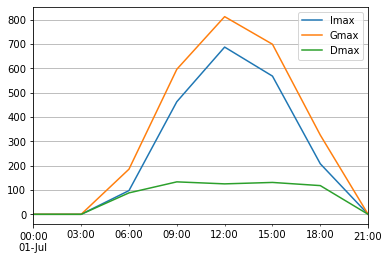

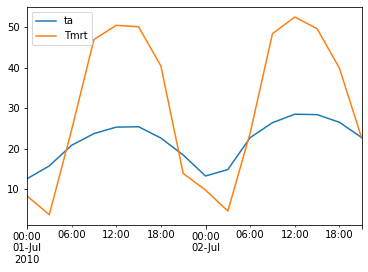

In [122]:
results = []
for i in range(0,len(df['ta'])):
    res = biometeo.Tmrt_calc (Ta=df['ta'][i], RH=df['rh'][i], v=df['vel'][i], N = df['tcc'][i], 
                               longitude=df['lon'][i], latitude=df['lat'][i], sea_level_height=df['elev'][i],
                               day_of_year = df.index[i].dayofyear, hour_of_day = np.mod(df.index[i].hour + df['lon'][i]/15, 24))
    res['UTC time'] = df.index[i]
    res['MSK time'] = df['MSK time'][i]
    
    res['PET'] = biometeo.PET(Ta = df['ta'][i], VP = biometeo.VP_RH_exchange(Ta = df['ta'][i], RH=df['rh'][i])['VP'], 
                              v = df['vel'][i], Tmrt = res['Tmrt'])
    results.append(res)

results = pd.concat ((pd.DataFrame.from_dict (results).set_index('MSK time'), df), axis=1)


df2draw = results['2010-07-01':'2010-07-02']



plt.figure()
df2draw['2010-07-01':'2010-07-01']['Imax'].plot()
df2draw['2010-07-01':'2010-07-01']['Gmax'].plot()
df2draw['2010-07-01':'2010-07-01']['Dmax'].plot()
plt.legend()
plt.grid()

plt.figure()
df2draw['ta'].plot()
df2draw['Tmrt'].plot()
plt.legend()

